Multiple linear regression

In [43]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# plt.style.use("/home/nicolas/Github/Programacion/machileLearning/deeplearning.mplstyle")
np.set_printoptions(precision=2)

In [44]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

x_train.shape: (3, 4), x_train: <class 'numpy.ndarray'> 
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_train.shape: (3,), y_train: <class 'numpy.ndarray'>
[460 232 178]


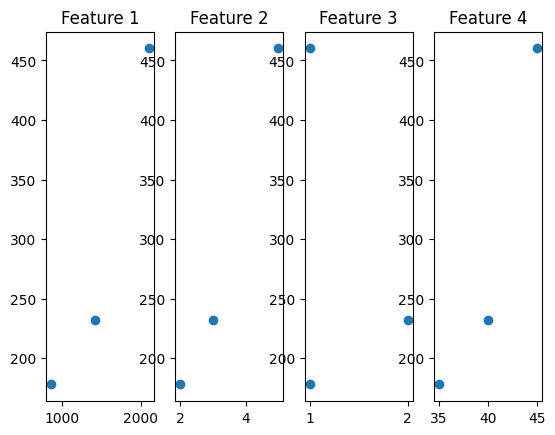

In [47]:
print(f"x_train.shape: {x_train.shape}, x_train: {type(x_train)} ")
print(x_train)
print(f"y_train.shape: {y_train.shape}, y_train: {type(y_train)}")
print(y_train)

fig, axs = plt.subplots(1, x_train.shape[1])

# For each feature in x_train
for i in range(x_train.shape[1]):
    # Create a scatter plot of the feature against y_train
    axs[i].scatter(x_train[:, i], y_train)
    axs[i].set_title('Feature ' + str(i+1))

# Show the plot
plt.show()

In [ ]:
b_init = 78
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

A partir de aqui se volvio a realizar la regresion lineal 
multiple aplicando el gradiente descendiente

In [ ]:
print(f"X shape: {x_train.shape}, X type: {type(X_train)}")
print(X_train)
print(f"y shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)



X shape: (3, 4), X type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]
0
1
2
3


In [ ]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [ ]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
      """
    
    n = x.shape[0]
    p = 0

    for i in range(n):
        p_i = x[i]*w[i]
        p = p + p_i
    p = p + b
    return p

In [ ]:
x_vec = X_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value:{x_vec}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb} ")

x_vec shape: (4,), x_vec value:[2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083 


In [ ]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """

    p = np.dot(x,w) + b
    return p
    

In [ ]:
# get a row from out training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")


x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [ ]:
def compute_cost(X, y, w, b):

    f_wb_i = 0
    cost = 0
    m = X.shape[0]

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
        
    cost = cost/(2*m)

    return cost

In [ ]:
cost = compute_cost(X_train, y_train, w_init, b_init)

print(f"Cost at optimal w: {cost}")

Cost at optimal w: 1.5578904428966628e-12


In [ ]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i,:],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw /m
    dj_db = dj_db /m

    return dj_db, dj_dw



In [ ]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
